# Notebook 1: Baseline Model & Metrics

## 1. Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

## 2. Load Data

In [2]:
train = pd.read_csv("churn_train.csv", na_values=[], keep_default_na=False)
test = pd.read_csv("churn_test.csv", na_values=[], keep_default_na=False)

In [3]:
train.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
train['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [6]:
train['Churn'].value_counts(normalize=True)

False    0.854464
True     0.145536
Name: Churn, dtype: float64

## 3. Preprocessing

In [7]:
def preprocess(df):
    df = df.copy()
    df['Churn'] = df['Churn'].map({True: 1, False: 0})
    df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
    df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})
    df = df.drop(columns=['State'])  # Drop high cardinality feature for now
    return df

In [8]:
train = preprocess(train)
test = preprocess(test)

In [9]:
train.head(5)

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [10]:
X_train = train.drop('Churn', axis=1)
y_train = train['Churn']
X_test = test.drop('Churn', axis=1)
y_test = test['Churn']

In [11]:
X_train.head(5)

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [12]:
y_train.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

## 4. Baseline Model

In [13]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_scores = clf.predict_proba(X_test)[:, 1]

## 5. Evaluation

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       572
           1       0.95      0.74      0.83        95

    accuracy                           0.96       667
   macro avg       0.95      0.86      0.90       667
weighted avg       0.96      0.96      0.95       667



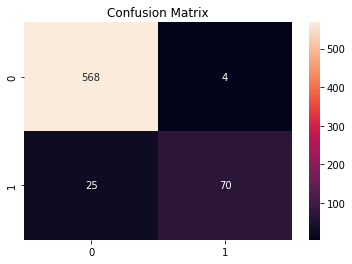

In [14]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

ROC-AUC: 0.9303643724696358


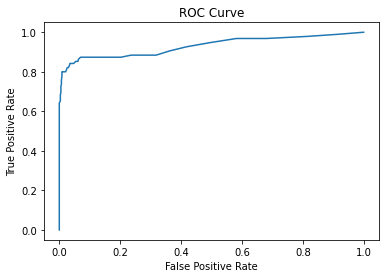

In [15]:
print("ROC-AUC:", roc_auc_score(y_test, y_scores))
fpr, tpr, _ = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Part 2 - Let's make the problem harder

In [33]:
# Let's unite the training and validation sets into one big set:
train = pd.read_csv("churn_train.csv", na_values=[], keep_default_na=False)
test = pd.read_csv("churn_test.csv", na_values=[], keep_default_na=False)
df_full = pd.concat([train, test], ignore_index=True)

In [34]:
df_full['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

|

**Let's understand how much churned users do we need to keep to get to 3.5% churned users:**

x/(2850+x) = 0.035

x = 0.035*(2850+x)

x = 99.75 + 0.035x

0.965x = 99.75

x = 99.75/0.965

x = 103.367875648

Validate:

104 + 2850 = 2954

104/2964 = 0.035

In [78]:
def imbalance_the_problem(df: pd.DataFrame, target_ratio: float, test_size: float) -> pd.DataFrame:
    print("Imbalancing your churn dataset...")
    print(f"target_ratio: {target_ratio:.2f}")
    # target_churn_count = 104
    non_fraud_amount = len(df[df['Churn'] == False])
    target_churn_count = int((target_ratio * non_fraud_amount) / (1-target_ratio))
    print(f"target_churn_count: {target_churn_count}")
    current_churn_count = df[df['Churn'] == True].shape[0]
    print(f"current_churn_count: {current_churn_count}")
    rows_to_remove = current_churn_count - target_churn_count
    print(f"rows_to_remove: {rows_to_remove}")
    if rows_to_remove > 0:
        indices_to_remove = df[df['Churn'] == 1].sample(n=rows_to_remove, random_state=42).index
        subdf = df.drop(indices_to_remove)
    imbtrain, imbtest = train_test_split(subdf, test_size=test_size, random_state=42)
    print(f"len(imbtrain): {len(imbtrain)}")
    print("Train churn dist:")
    print(imbtrain['Churn'].value_counts(normalize=True))
    print("Tetst churn dist:")
    print(imbtest['Churn'].value_counts(normalize=True))
    return imbtrain, imbtest

In [79]:
imbtrain, imbtest = imbalance_the_problem(df_full, target_ratio=0.035, test_size=0.2)

Imbalancing your churn dataset...
target_ratio: 0.04
target_churn_count: 103
current_churn_count: 483
rows_to_remove: 380
len(imbtrain): 2362
Train churn dist:
False    0.965707
True     0.034293
Name: Churn, dtype: float64
Tetst churn dist:
False    0.962775
True     0.037225
Name: Churn, dtype: float64


In [80]:
imbtrain.to_csv('imbtrain.csv', index=False)

In [81]:
imbtest.to_csv('imbtest.csv', index=False)

# Part 3: How does Random Forest performs on this problem

In [82]:
post_imbtrain = preprocess(imbtrain)
post_imbtest = preprocess(imbtest)

In [85]:
X_train = post_imbtrain.drop('Churn', axis=1)
y_train = post_imbtrain['Churn']
X_test = post_imbtest.drop('Churn', axis=1)
y_test = post_imbtest['Churn']

In [86]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_scores = clf.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       569
           1       1.00      0.36      0.53        22

    accuracy                           0.98       591
   macro avg       0.99      0.68      0.76       591
weighted avg       0.98      0.98      0.97       591



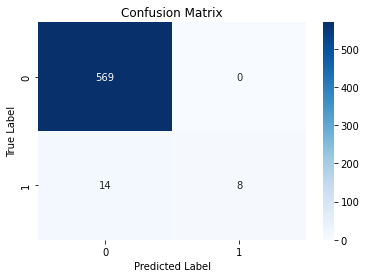

In [88]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()